In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Q1

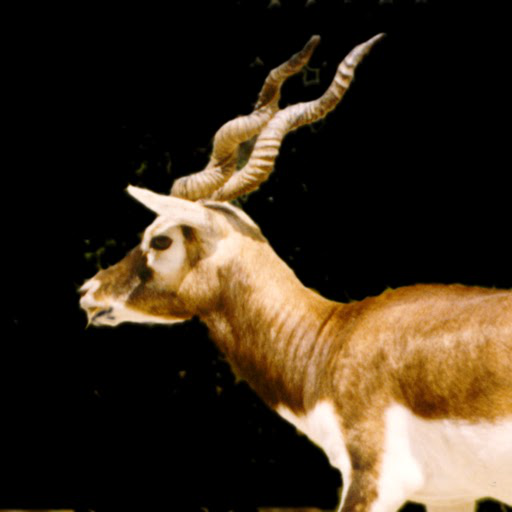

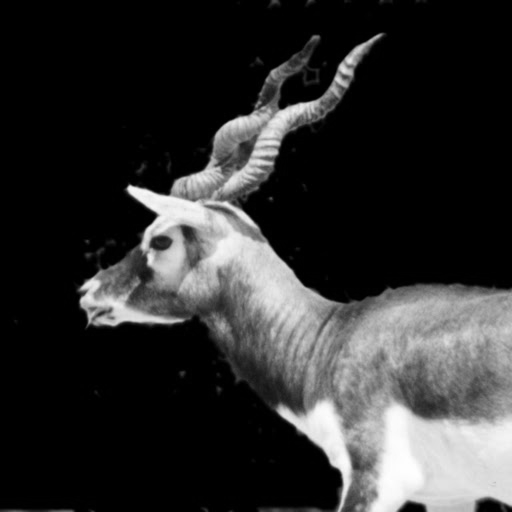

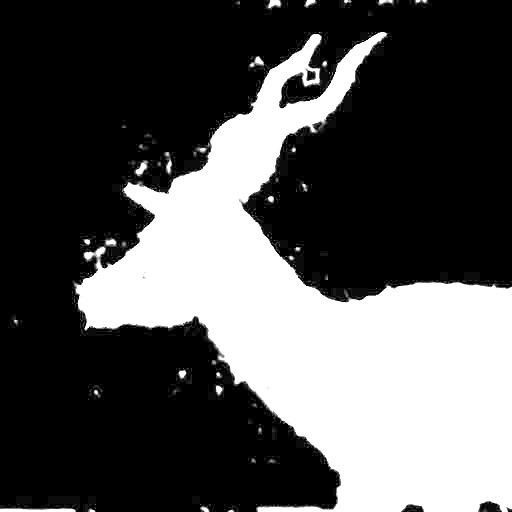

Area of Black Pixels is:  100746
Size of the image is:  262144


In [ ]:
#question no-1
from google.colab.patches import cv2_imshow
import os

path = "/content/drive/MyDrive/blackbuck.jpg"
if os.path.exists(path):
  #image = cv2.imread(path,1)
  image = Image.open(path)
  if (image is not None):
    #cv2_imshow(image)
    display(image)
    print(" ")
    #gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_img = image.convert('L')
    gray_img.save("/content/drive/MyDrive/blackbuck.jpg_gray.jpeg")
    #cv2_imshow(gray_img)
    display(gray_img)
    print(" ")
    img = Image.open("/content/drive/MyDrive/blackbuck.jpg_gray.jpeg").convert('RGB')
    pixel_map = img.load()
    width, height = gray_img.size

    for i in range(width):
      for j in range(height):   

        # getting the pixel value.
        r, g, b = pixel_map[i,j]
          
        # Apply scaling:
        scaled = 0.8*5*(r + g + b)
  
        # setting the pixel value.
        pixel_map[i, j] = (int(scaled), int(scaled), int(scaled))
    display(img)
    img.save("/content/drive/MyDrive/blackbuck.jpg_scaled.jpeg")
    scaled_image = cv2.imread("/content/drive/MyDrive/blackbuck.jpg_scaled.jpeg", 0)
    count = cv2.countNonZero(scaled_image)
    print("Area of Black Pixels is: ",count)
    print("Size of the image is: ",scaled_image.size)

else:
  print("Path does not exist:", path)



Q2 AND Q5

Histogram Equalization:
 


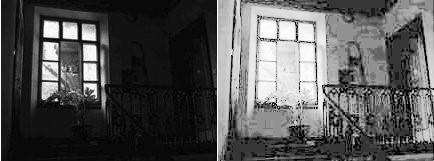

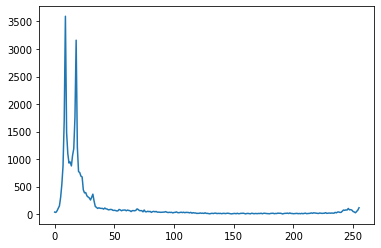

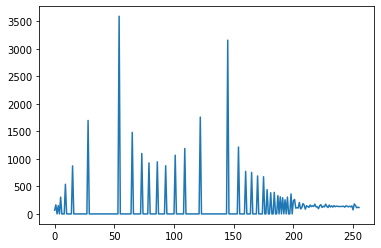

 
3x3 Averaging Convolution Filter:
 


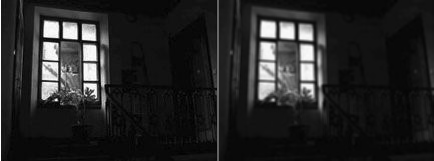

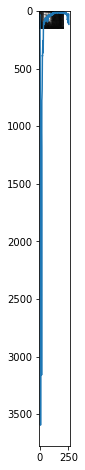

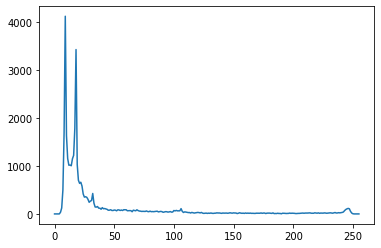

 
Gray Level Transformations
 
1. Log Transformation: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


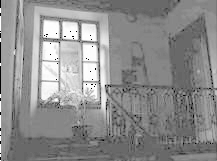

 
2. Power-Law (Gamma) Transformation: 
gamma = 0.1


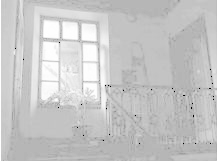

gamma = 0.5


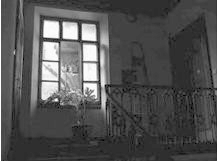

gamma = 1.2


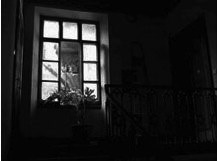

gamma = 2.2


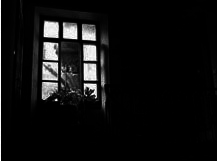

gamma = 5


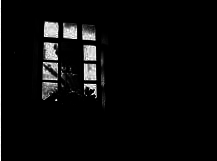

In [ ]:
#question no.-2 and 5
from google.colab.patches import cv2_imshow
import os

path = "/content/drive/MyDrive/test2.jpg"
if os.path.exists(path):
  img = cv2.imread(path,0)
  equ = cv2.equalizeHist(img)

  # stacking images side-by-side
  res = np.hstack((img, equ))
  # show image input vs output
  print("Histogram Equalization:")
  print(" ")
  cv2_imshow(res)

  histr = cv2.calcHist([img],[0],None,[256],[0,256])
  histr_equ = cv2.calcHist([equ],[0],None,[256],[0,256])
  
  plt.plot(histr)
  plt.show()
  plt.plot(histr_equ)
  plt.show()

  print(" ")
  print("3x3 Averaging Convolution Filter:")
  print(" ")
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  fig, ax = plt.subplots(1, figsize=(12,8))
  plt.imshow(image)
  abc=np.ones((3,3))
  kernel = np.ones((3, 3), np.float32) / 9
  image_conv = cv2.filter2D(image, -1, kernel)
  res1 = np.hstack((image, image_conv))
  cv2_imshow(res1)
  print( " ")
  hist = cv2.calcHist([image],[0],None,[256],[0,256])
  hist_conv = cv2.calcHist([image_conv],[0],None,[256],[0,256])
  
  plt.plot(hist)
  plt.show()
  plt.plot(hist_conv)
  plt.show() 
  
  print(' ')
  print("Gray Level Transformations")
  print(' ')
  print("1. Log Transformation: ")
  # Apply log transform.
  c = 255/(np.log(1 + np.max(img)))
  log_transformed = c * np.log(1 + img)
  
  # Specify the data type.
  log_transformed = np.array(log_transformed, dtype = np.uint8)
  cv2_imshow(log_transformed)

  print(' ')
  print("2. Power-Law (Gamma) Transformation: ")
  # Trying 5 gamma values.
  for gamma in [0.1, 0.5, 1.2, 2.2, 5]:
      
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
  
    # Print images.
    print('gamma = '+str(gamma))
    cv2_imshow(gamma_corrected)

else:
  print("Path does not exist:", path)


Q3

 
Original Image


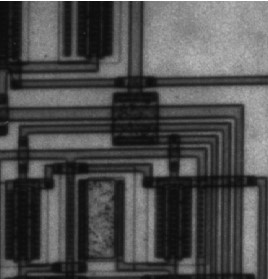

 
Canny


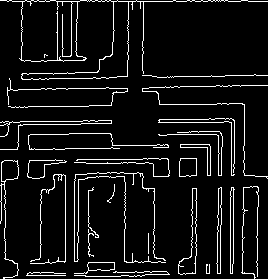

 
Sobel X


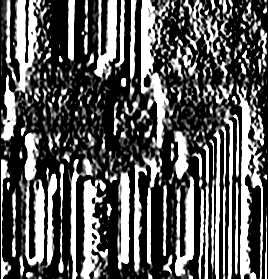

 
Sobel Y


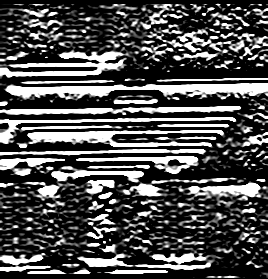

 
Sobel


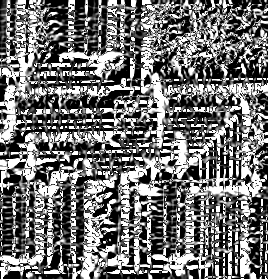

 
Prewitt X


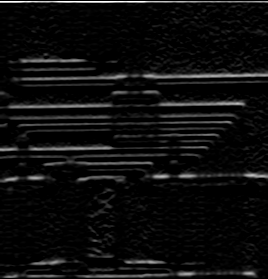

 
Prewitt Y


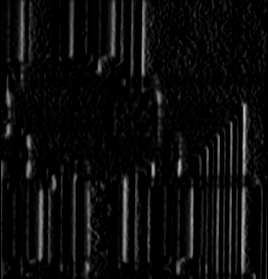

 
Prewitt


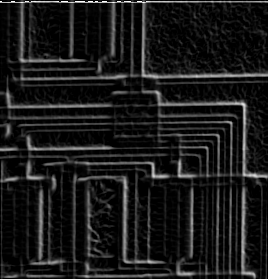

 
Laplacian


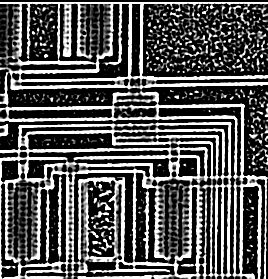

In [ ]:
#question n.-3
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

path = "/content/drive/MyDrive/test3.jpg"
img = cv2.imread(path)
img_gaussian = cv2.GaussianBlur(img,(3,3),0)
gray = cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2GRAY)


#canny
img_canny = cv2.Canny(img,100,200)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

#laplacian
img_laplacian = cv2.Laplacian(img_gaussian, cv2.CV_64F, ksize=5)

print(' ')
print("Original Image")
cv2_imshow(img)
print(' ')
print("Canny")
cv2_imshow(img_canny)
print(' ')
print("Sobel X")
cv2_imshow(img_sobelx)
print(' ')
print("Sobel Y")
cv2_imshow(img_sobely)
print(' ')
print("Sobel")
cv2_imshow(img_sobel)
print(' ')
print("Prewitt X")
cv2_imshow(img_prewittx)
print(' ')
print("Prewitt Y")
cv2_imshow(img_prewitty)
print(' ')
print("Prewitt")
cv2_imshow(img_prewittx + img_prewitty)
print(' ')
print("Laplacian")
cv2_imshow(img_laplacian)
print(' ')

Q4

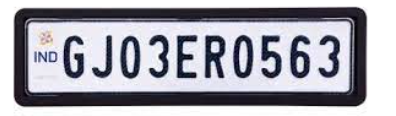

<class 'numpy.ndarray'>
Shape of the image (116, 396, 3)
 


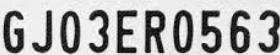

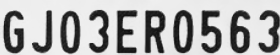

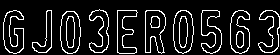

 
 
 
 
Important Characters in the image :  10


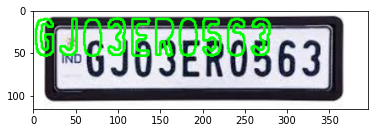

In [ ]:
#question n.-4
from google.colab.patches import cv2_imshow
import os

path = "/content/drive/MyDrive/numberplate.png"
if os.path.exists(path):
  image = cv2.imread(path,1)
  if (image is not None):
    cv2_imshow(image)
    print(type(image))
  
    # Check the shape of the input image
    print("Shape of the image", image.shape)
    print(' ')
    image1 = image[25:80, 60:340] 

    gray_img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_img)
    print(' ')
    gray_img = cv2.bilateralFilter(gray_img, 13, 15, 15)
    cv2_imshow(gray_img)
    print(' ')

    canny = cv2.Canny(gray_img, 30, 150, 3)
    cv2_imshow(canny)
    print(' ')
 
    (cnt, hierarchy) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(' ')
    cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
    print(' ')
    plt.imshow(rgb)
    print(' ')
    print("Important Characters in the image : ", len(cnt))


else:
  print("Path does not exist:", path)